# Scikit-learn logistic regression walk-through
#### Dennis Dimitri Krutkin

## Importing and previewing data
The dataset used in this demonstration is the Pima Indians Diabetes Database from Kaggle which can be found at: 
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd 

diabetes_input_data = pd.read_csv("diabetes.csv")

#Preview the data:
diabetes_input_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Splitting data into features and labels
The features (x) are variables which are being used to predict labels (y)

In this example, the features are all the diagnostic attributes (Pregnancies, Glucose, etc) being used to predict the label (Outcome) - diabetic (1) or not (0)

In [2]:
#Features - all columns except "Outcome"
X = diabetes_input_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
#Labels - "Outcome", 1 (Diabetic) or 0 (Not Diabetic)
Y = diabetes_input_data.Outcome

#Preview feature matrix
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
#Preview labels
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Splitting data into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

#Splits the input data into training and testing sets:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.15, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

#Initializes the logistic regression:
logreg = LogisticRegression(max_iter=150)

#Fits the model with the training data:
logreg.fit(X_train,y_train)

#Predicts the labels for the testing set:
y_pred=logreg.predict(X_test)

#Previews the predicted labels for the testing set:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1])

## Confusion matrices and evaluation metrics

In [6]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[71,  7],
       [13, 25]])

Text(0.5, 257.44, 'Predicted label')

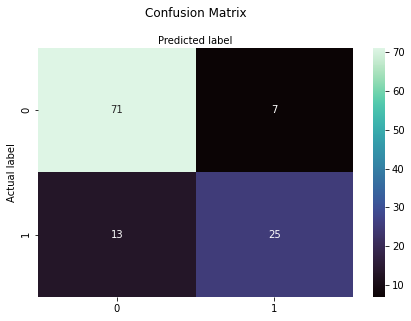

In [7]:
#Import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Initial layout
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Creates heatmap:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="mako") 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Evaluation metrics

In [8]:
print("The accuracy is: ", metrics.accuracy_score(y_test, y_pred))
print("The precision is: ", metrics.precision_score(y_test, y_pred))
print("The recall is: ", metrics.recall_score(y_test, y_pred))

The accuracy is:  0.8275862068965517
The precision is:  0.78125
The recall is:  0.6578947368421053
